## EXERCISE 1

In [5]:
import numpy as np

X = np.array([[1,2,1,4,5], [2,3,3,4,5]])

M = np.mean(X, axis=1)
covMatrix = np.cov(X,bias=True)
print(M)
print (covMatrix)

[2.6 3.4]
[[2.64 1.56]
 [1.56 1.04]]


## EXERCISE 1.1.3

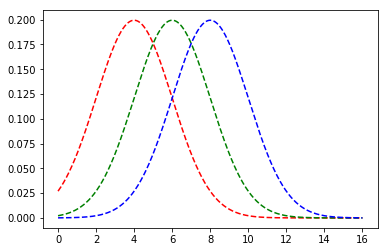

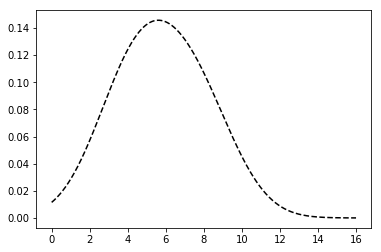

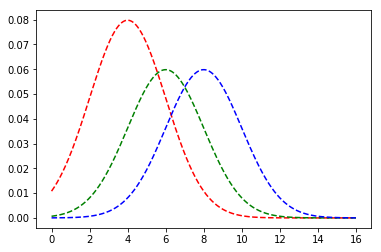

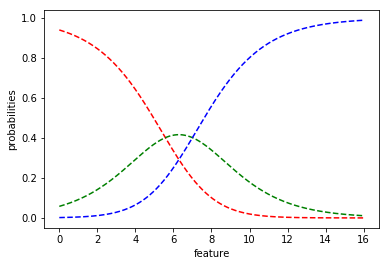

In [6]:
#Bayes example for Python3
import numpy as np
from scipy.stats import norm
import pylab as P


# Bayes decision theory
# we define three univariate normal distributions p1,p2,p3
# with prior probabilities P1,P2,P3

N=1000;

# Prior probabilities
P1=0.4;
P2=0.3;
P3=1-P1-P2;

# Definitions of three normals
grid = P.linspace(0,16,N)

# Class conditional densities p(x|c)
P.figure(1)
mean1 =  4
sigma1 = 2

y1 = norm.pdf(grid, mean1, sigma1 )
l = P.plot(grid, y1, 'r--', linewidth=1.5)

mean2 = 6
sigma2 = 2
y2 = norm.pdf(grid, mean2, sigma2 )
l = P.plot(grid, y2, 'g--', linewidth=1.5)

mean3=8
sigma3=2
y3 = norm.pdf(grid, mean3, sigma3 )
l = P.plot(grid, y3, 'b--', linewidth=1.5)

P.show()

#Evidence p(x)
P.figure(2)
px=(y1*P1+y2*P2+y3*P3)
P.plot( grid, px,'k--', linewidth=1.5)
P.show()

#Likelihood times prior
P.figure(3)
P1X=y1*P1;
P2X=y2*P2;
P3X=y3*P3;

P.plot(grid,P1X,'r--', linewidth=1.5)
P.plot(grid,P2X,'g--', linewidth=1.5)
P.plot(grid,P3X,'b--', linewidth=1.5)
P.show()


# posterior class probabilities P(c|x)')
P.figure(4)
P1X=y1*P1/px;
P2X=y2*P2/px;
P3X=y3*P3/px;
#print P1X
#print P2X
#print P3X

P.plot(grid,P1X,'r--', linewidth=1.5)
P.plot(grid,P2X,'g--', linewidth=1.5)
P.plot(grid,P3X,'b--', linewidth=1.5)
P.xlabel('feature')
P.ylabel('probabilities')
P.show()


## Lecture 4

[1.28402771 0.0490834 ]


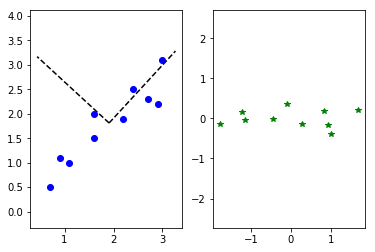

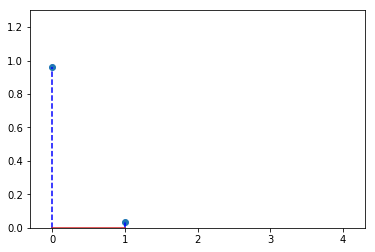

"\n########################################################################3\n# Count sequences and load them locally\nn_sequences = 0\nwith open('CDS.tbl','r') as f:\n  linelist = []\n  for line in f:\n      linelist.append(line)\n      n_sequences +=1\n# Take only the first 4 CDS for each sequence\nCDS = np.zeros((n_sequences,4))\ndummyvar = 0\nfor row in linelist :\n      tempstr = linelist[dummyvar]\n      temparray =  tempstr.split()\n\n      for kk in range(1,5):\n          CDS[dummyvar,kk-1] = temparray[kk]\n      dummyvar +=1\n\neigval,projection,eigvec = getcomponents(CDS)\n"

In [8]:
import numpy as np
from pylab import plot,subplot,axis,stem,show,figure

def getcomponents(A):
 #Subtract the mean to the data matrix
 M =  (A - np.mean(A,axis=0)).T
 #Compute Covariance Matrix
 COV = np.cov(M)
 #Eigendecomposition
 eigval, eigvec = np.linalg.eig(COV)
 #Projection of the data in the new space
 projection = np.dot(eigvec.T,M)
 print(eigval) 
 return eigval,projection,eigvec

A = np.array([ [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9],
   [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1] ])
eigval,projection,eigvec = getcomponents(A.T)

figure()
subplot(121)
# every eigenvector describe the direction
# of a principal component.
m = np.mean(A,axis=1) 
plot([0, -eigvec[0,0]*2]+m[0], [0, -eigvec[0,1]*2]+m[1],'--k')
plot([0, eigvec[1,0]*2]+m[0], [0, eigvec[1,1]*2]+m[1],'--k')
plot(A[0,:],A[1,:],'ob') # the data
axis('equal')
subplot(122)
# new data
plot(projection[0,:],projection[1,:],'*g')
axis('equal')
show()

perc =  (eigval)/sum(eigval)
figure()
# the following plot shows that first two components
# account for 100% of the variance.
stem(range(len(perc)),perc,'--b')
axis([-0.3,4.3,0,1.3])
show()
'''
########################################################################3
# Count sequences and load them locally
n_sequences = 0
with open('CDS.tbl','r') as f:
  linelist = []
  for line in f:
      linelist.append(line)
      n_sequences +=1
# Take only the first 4 CDS for each sequence
CDS = np.zeros((n_sequences,4))
dummyvar = 0
for row in linelist :
      tempstr = linelist[dummyvar]
      temparray =  tempstr.split()

      for kk in range(1,5):
          CDS[dummyvar,kk-1] = temparray[kk]
      dummyvar +=1

eigval,projection,eigvec = getcomponents(CDS)
'''
